<a href="https://colab.research.google.com/github/walterowisk/DIO_LabProject-Pipeline-ETL-Python/blob/main/DIO_LabProject_Pipeline_ETL_Analisando_Dados_de_Venda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Contruindo um Pipeline ETL com Python - Analisando Dados de Venda**

Este é um desafio de projeto do **Santander Bootcamp 2023 - Ciência de Dados com Python.**

O projeto modelo tem o título **Explorando IA Generativa em um Pipeline de ETL com Python.**

[Clique para ver o notebook do projeto modelo](https://colab.research.google.com/drive/1SF_Q3AybFPozCcoFBptDSFbMk-6IVGF-?usp=sharing#scrollTo=k5fA5OrXt1a3)

## 🚀 Entendendo o desafio
Inspirado pelo projeto modelo o aluno deveria replicar ou reimaginar uma pipeline ETL utilizando Python.

## 💰 Meu projeto ⚽ 🏄
Imaginando uma loja de produtos esportivos meu desafio é criar um pipeline ETL para extrair dados de vendas de um arquivo CSV, realizar algumas transformações simples como cálculo de total de vendas por produto e por período e por fim realizar carregamento dos dados transformados em um novo arquivo CSV além de criar uma visualização em tela para mostrar o resultados por meio de gráficos.

# **E**xtract
Nesta etapa vamos extrair os dados de vendas do arquivo `dados-venda.csv`. Este arquivo traz informações referentes ao ano de 2023 considerando o período de janeiro a agosto. As colunas contidas no arquivo são as seguintes: `Produto`, `Data`, `Quantidade` e `Valor`.

In [9]:
import pandas as pd

# Carregando o arquivo CSV em um DataFrame
file_path = "dados-venda.csv"
df = pd.read_csv(file_path)

# Visualizando as primeiras linhas do DataFrame para verificar os dados
print(df.head())


           Produto        Data  Quantidade  Valor
0         Camiseta  2023-08-01           5   15.0
1            Tênis  2023-08-02           2   80.0
2  Bola de Futebol  2023-08-03           3   25.0
3            Short  2023-08-04           4   20.0
4            Luvas  2023-08-05           1   10.0


# Transform
Agora vamos calcular o total de vendas por produto e por mês.

In [13]:
# Calculando o total de vendas por produto
total_sales_by_product = df.groupby('Produto')['Valor'].sum()

# Extraindo o mês da coluna 'Data'
df['Mes'] = pd.to_datetime(df['Data']).dt.month

# Calculando o total de vendas por mês
total_sales_by_month = df.groupby('Mes')['Valor'].sum()

# Visualizando os resultados das transformações
print("Total de Vendas por Produto:")
print(total_sales_by_product)

print("\nTotal de Vendas por Mês:")
print(total_sales_by_month)


Total de Vendas por Produto:
Produto
Bicicleta             1200.0
Bola de Futebol        100.0
Boné                    48.0
Camisa de Ciclismo     180.0
Camiseta                60.0
Caneleiras              72.0
Capacete                80.0
Corda de Pular          12.0
Halteres                44.0
Jaqueta                100.0
Luvas                   40.0
Meias                   20.0
Prancha de Surf        300.0
Raquete de Tênis       120.0
Rede de Vôlei           60.0
Short                   80.0
Skate                  180.0
Squeeze                 16.0
Tênis                  640.0
Name: Valor, dtype: float64

Total de Vendas por Mês:
Mes
1     220.0
2     540.0
3     373.0
4     120.0
5     184.0
6     122.0
7     117.0
8    1676.0
Name: Valor, dtype: float64


# **L**oad
 Salvando os dados transformados em um novo arquivo CSV ou visualiando em tela.

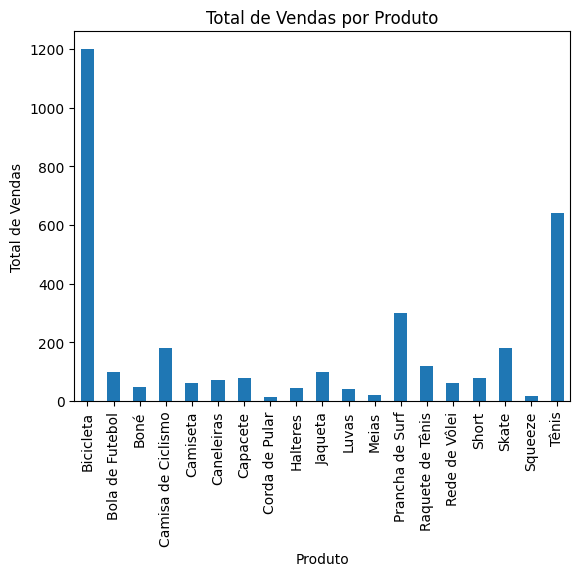

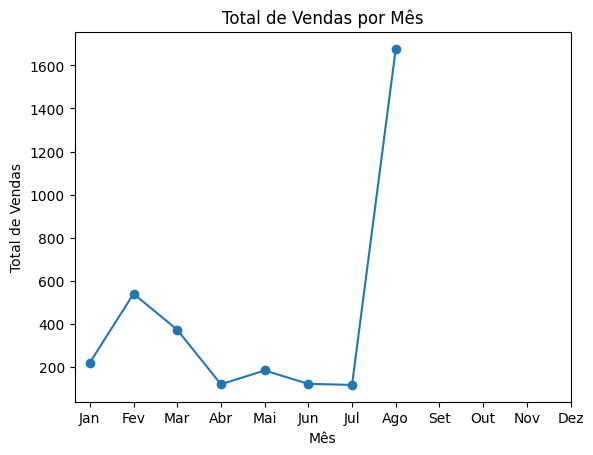

In [14]:
# Salvando os dados transformados em um arquivo CSV
total_sales_by_product.to_csv("total_vendas_por_produto.csv")
total_sales_by_month.to_csv("total_vendas_por_mes.csv")

# Alternativamente, criar uma visualização simples usando Matplotlib
import matplotlib.pyplot as plt

# Criando gráfico de barras para total de vendas por produto
total_sales_by_product.plot(kind='bar')
plt.xlabel('Produto')
plt.ylabel('Total de Vendas')
plt.title('Total de Vendas por Produto')
plt.show()

# Criando gráfico de linha para total de vendas por mês
total_sales_by_month.plot(kind='line', marker='o')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.title('Total de Vendas por Mês')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.show()
